# Probability & Statistics for EECS:

# Homework \#08




Due on April 09, 2023 at 23:59




Name: **Zhou Shouchen**

Student ID: 2021533042

# Problem 1

From the Universality of Uniform.

Let $U\sim Unif(0,1)$, and F be the CDF of a continous function and strictly incearing on the supoort.
(It is clear and easy to verify that the CDF functions F in (a), (b), (c) are meeting the requirements).

And let $X = F^{-1}(U)$, then $X$ is an r.v. with CDF F.

So we can do some sample to the Uniform distribution, and put them into $F^{-1}(x)$.

Then we can get the PDF with the method of inverse transform sampling, and plot it with blue histogram.

For comparson, we can directly plot the PDF by plotting the function $f(x) = F'(x)$ in orange line.

(a) From what we have learned, the logistic distribution has CDF $$F(x) = \dfrac{1}{1+e^{-x}}$$

And its PDF is $$f(x) = F'(x) = \dfrac{-e^{-x}}{(1+e^{-x})^2}$$

Let $y = F(x) = \dfrac{1}{1+e^{-x}}$, then $e^{-x} = \dfrac{1-y}{y}$,

i.e. $x = -ln(\dfrac{1-y}{y})$, so $x = ln(\dfrac{y}{1-y})$.

So the inverse funciton of its CDF is $$ F^{-1}(x) = ln(\dfrac{x}{1-x})$$

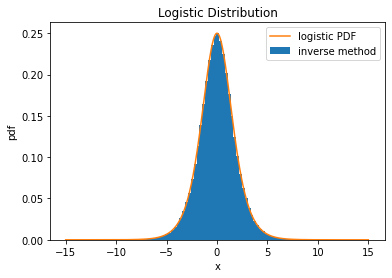

In [1]:
# (a) Logistic Distribution
import numpy as np
import matplotlib.pyplot as plt

def logistic_PDF(x): # the PDF of the logistic distribution
    return np.exp(-x) / (1 + np.exp(-x))**2

def logistic_inverse(x): # the inverse of the logistic distribution
    return np.log(x / (1 - x))

def inverse_transform_sampling(sample_size): # inverse transform sampling
    u = np.random.uniform(0, 1, sample_size) # uniform random numbers
    return logistic_inverse(u)

sample_size = 1000000

x = np.linspace(-15, 15, 1000) # sample points for plotting pdf
pdf = logistic_PDF(x) # pdf values at sample points

# plot the histogram of the inverse transform sampling method
plt.hist(inverse_transform_sampling(sample_size), bins = 100, density = True)

# plot the pdf
plt.plot(x, pdf)

plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Logistic Distribution')
plt.legend(['logistic PDF','inverse method'])
plt.show()


(b) From what we have learned, the Rayleigh distribution has CDF $$F(x) = \dfrac{1}{1+e^{-x}},\forall x > 0$$

And its PDF is $$f(x) = F'(x) = x\cdot e^{-\frac{-x^2}{2}}$$

Let $ y = F(x) = 1 - e^{\frac{x^2}{2}}, \forall x > 0$, then $e^{-\frac{x^2}{2}}=1-y$

i.e. $-\dfrac{x^2}{2}=ln(1-y)$, and since $x>0$, so $x = \sqrt{-2ln(1-y)}$

So the inverse funciton of its CDF is $$ F^{-1}(x) = \sqrt{-2ln(1-x)} $$

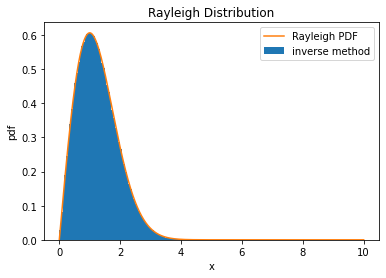

In [2]:
# (b) Rayleigh Distribution

import numpy as np
import matplotlib.pyplot as plt

def Rayleigh_PDF(x): # the PDF of the Rayleigh distribution
    return x * np.exp(-x**2 / 2)

def Rayleigh_inverse(x): # the inverse of the Rayleigh distribution
    return np.sqrt(-2 * np.log(1 - x))

def inverse_transform_sampling(sample_size): # inverse transform sampling
    u = np.random.uniform(0, 1, sample_size) # uniform random numbers
    return Rayleigh_inverse(u)

sample_size = 1000000

x = np.linspace(0, 10, 1000) # sample points for plotting pdf
pdf = Rayleigh_PDF(x) # pdf values at sample points

# plot the histogram of the inverse transform sampling method
plt.hist(inverse_transform_sampling(sample_size), bins = 100, density = True)

# plot the pdf
plt.plot(x, pdf)

plt.xlabel('x')
plt.ylabel('pdf')
plt.title('Rayleigh Distribution')
plt.legend(['Rayleigh PDF','inverse method'])
plt.show()

(c)  From what we have learned, the Exponential distribution has CDF $$F(x) = 1 - e^{-x}, \forall x > 0$$

And its PDF is $$f(x) = F'(x) = e^{-x}$$

Let $ y = F(x) = 1 - e^{-x}, \forall x > 0$, then $e^{-x}=1-y$

i.e. $-x = ln(1-y)$, and since $x>0$, so $x = -ln(1-y) $

So the inverse funciton of its CDF is $$ F^{-1}(x) = -ln(1-x) $$

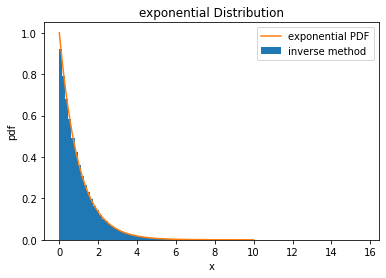

In [3]:
# (c) Exponential Distribution
import numpy as np
import matplotlib.pyplot as plt

def exponential_PDF(x): # the PDF of the exponential distribution
    return np.exp(-x)

def exponential_inverse(x): # the inverse of the exponential distribution
    return -np.log(1 - x)

def inverse_transform_sampling(sample_size): # inverse transform sampling
    u = np.random.uniform(0, 1, sample_size) # uniform random numbers
    return exponential_inverse(u)

sample_size = 1000000

x = np.linspace(0, 10, 1000) # sample points for plotting pdf
pdf = exponential_PDF(x) # pdf values at sample points

# plot the histogram of the inverse transform sampling method
plt.hist(inverse_transform_sampling(sample_size), bins = 100, density = True)

# plot the pdf
plt.plot(x, pdf)

plt.xlabel('x')
plt.ylabel('pdf')
plt.title('exponential Distribution')
plt.legend(['exponential PDF','inverse method'])
plt.show()

So above all, we can see that the blue histogram suits the orange line quite well.

# Problem 2


(a) For Bernouli distribution, let $X\sim Bern(0.5)$.

So $P(X=0) = 0.5, P(X=1) = 0.5$.

And we can test this by generate a sequence of variable, and let $X=0$ when the variable is $\leq 0.5$, and let $X=1$ otherwise.

So we can get the probability with a lot of times simulation.

100%|██████████| 1000000/1000000 [00:07<00:00, 139706.07it/s]


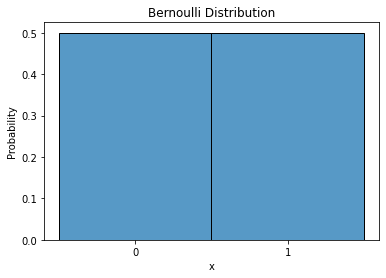

In [4]:
# (a) Bernoulli distribution
import seaborn as sns
import numpy as np
import tqdm
import matplotlib.pyplot as plt

def bernoulli(p):
    x = np.random.uniform(0,1)
    if x <= p:
        return 0
    else:
        return 1

n = 1000000
x = np.zeros(n)
for i in tqdm.tqdm(range(n)):
    x[i] = bernoulli(0.5)

ax = sns.histplot(x, stat = 'probability', bins = 'auto', discrete = True)
ax.set_title('Bernoulli Distribution')
ax.set_xlabel('x')
plt.xticks(np.arange(0, 2))
plt.show()

(b) For Binomial distribution, let $X\sim Bin(20, 0.5)$.

So $P(X=k) = {n\choose k}p^kq^{n-k} = {20\choose k}(0.5)^{20}$.

We can regard $X$ as the time of successful Bernoulli tasks.

i.e. $X_i\sim Bern(0.5), X = \sum\limits_{i=1}^{20}X_i$

So we can get the probability with a lot of times simulation.

100%|██████████| 1000000/1000000 [00:58<00:00, 16967.14it/s]


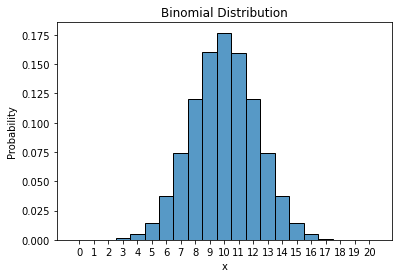

In [24]:
# (b) Binomial distribution
import seaborn as sns
import numpy as np
import tqdm
import matplotlib.pyplot as plt

def bernoulli(p):
    x = np.random.uniform(0,1)
    if x <= p:
        return 0
    else:
        return 1

def binomial(n, p):
    num = 0
    for _ in range(n):
        num += bernoulli(p)
    return num

n = 1000000
x = np.zeros(n)
for i in tqdm.tqdm(range(n)):
    x[i] = binomial(20, 0.5)

ax = sns.histplot(x, stat = 'probability', bins = 'auto', discrete = True)
ax.set_title('Binomial Distribution')
ax.set_xlabel('x')
plt.xticks(np.arange(0, 21))
plt.show()

(c) For Geometry distribution, let $X\sim Geom(0.5)$.

So $P(X=k) = q^kp = (0.5)^{k+1}$.

We can regard $X$ as the time of failures before the first success.

And we can simulate whether a task is success or failure, and then count the times of failures before the first success.

So we can get the probability with a lot of times simulation.

100%|██████████| 1000000/1000000 [00:05<00:00, 168119.99it/s]


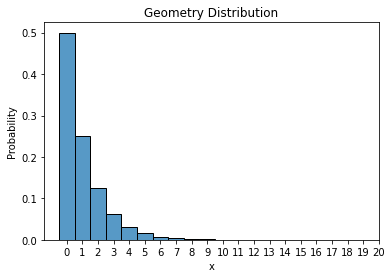

In [22]:
# (c) Geometric distribution
import seaborn as sns
import numpy as np
import tqdm

def geometry(p):
    failure_time = 0
    while True:
        x = np.random.uniform(0,1)
        if x <= p:
            failure_time += 1
        else:
            return failure_time

n = 1000000
x = np.zeros(n)
for i in tqdm.tqdm(range(n)):
    x[i] = geometry(0.5)

ax = sns.histplot(x, stat = 'probability', bins = 'auto', discrete = True)
ax.set_title('Geometry Distribution')
ax.set_xlabel('x')
plt.xticks(np.arange(0, 21))
plt.show()

(d) For Negative Binomial distribution, let $X\sim NBin(10, 0.5)$.

So $P(X=n) = {n+r-1\choose r-1}p^rq^n = {n+10-1\choose 10-1}(0.5)^r(0.5)^n = {n+9\choose 9}(0.5)^{n+10}$.

We can regard $X$ as the time of failures before the $r$-th(10th) success.

So we can get the probability with a lot of times simulation.

100%|██████████| 1000000/1000000 [01:00<00:00, 16477.92it/s]


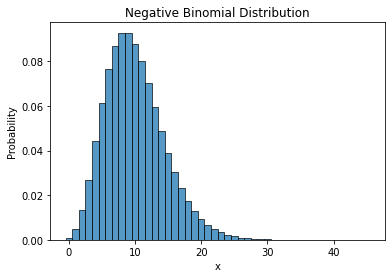

In [7]:
# (d) Negative Binomial distribution
import seaborn as sns
import numpy as np
import tqdm

def negative_binomial(r, p):
    failure_time = 0
    success_time = 0

    while success_time < r:
        x = np.random.uniform(0,1)
        if x <= p:
            failure_time += 1
        else:
            success_time += 1
    return failure_time

n = 1000000
x = np.zeros(n)
for i in tqdm.tqdm(range(n)):
    x[i] = negative_binomial(10, 0.5)

ax = sns.histplot(x, stat = 'probability', bins = 'auto', discrete = True)
ax.set_title('Negative Binomial Distribution')
ax.set_xlabel('x')
plt.show()

# Problem 3



$U_i\sim Unif(0,1)$

$N=\max \left\{n: \prod\limits_{i=1}^n U_i \geq e^{-1}\right\}$


So we can simulation this by multiple the generated $U_i$ one by one, until the result is less than $\dfrac{1}{e}$

In [18]:
import numpy as np
import tqdm

T = 5000 # generate 5000 values

N = np.zeros(T) # N is the array of sample results

for i in tqdm.tqdm(range(T)):
    n = 1
    mul = 1.0
    while True:
        x = np.random.uniform(0,1)
        mul *= x
        if mul < np.exp(-1):
            N[i] = n - 1
            break
        else:
            n += 1

100%|██████████| 5000/5000 [00:00<00:00, 67768.77it/s]


In [19]:
print("E(N) = ", np.mean(N))

E(N) =  1.0238


(a) $E(N) = 1.0238$

In [20]:
print("Var(N) = ", np.var(N))

Var(N) =  1.01763356


(b) $Var(N) = 1.01763356$

In [21]:
print("P(N = 0) = ", np.sum(N == 0) / 5000)
print("P(N = 1) = ", np.sum(N == 1) / 5000)
print("P(N = 2) = ", np.sum(N == 2) / 5000)
print("P(N = 3) = ", np.sum(N == 3) / 5000)

P(N = 0) =  0.3592
P(N = 1) =  0.369
P(N = 2) =  0.1834
P(N = 3) =  0.0694


(c) $P(N = 0) = 0.3592$

$P(N = 1) = 0.369$

$P(N = 2) = 0.1834$

$P(N = 3) = 0.0694$

(d) From the above results, we could estimate that the distribution of $X$ is $Pois(1)$.

Verify: if $X\sim Pois(1)$, then $P(X=k)=\dfrac{e^{-\lambda}\lambda^k}{k!} = \dfrac{e^{-1}}{k!}$

and $E(X) = \lambda = 1, Var(X) = \lambda = 1$

$P(X = 0) = 0.367879$

$P(X = 1) = 0.367879$

$P(X = 2) = 0.1839397$

$P(X = 3) = 0.06131324$

And we can see that the result of $X$ is really close to $N$, so we could estimate that $N\sim Pois(1)$.

Proof:

$$\prod\limits_{i=1}^n U_i \geq e^{-1}$$ 
$$i.e.\ \ \sum\limits_{i=1}^n \ln U_i \geq-1$$
$$i.e.\ \ \sum\limits_{i=1}^n-\ln U_i \leq 1$$
Let $U_i \sim Unif(0,1)$

and let $X_i=-\ln U_i$.

So $$U_i=e^{-X_i}$$
i.e. $$1-U_i=1-e^{-X_i}$$

Since $1-U_i\sim Unif(0,1)$, and let $F(x) = 1-e^{-x}$.

So $F(X_i)\sim Unif(0,1)$

so with the universality of Uniform, we can get that $F(X)$ is the CDF of $X_i$

And since $F(x) = 1-e^{-x}$, which is the CDF of $Expo(1)$, so $X_i\sim Expo(1)$

So the PDF of $X_i$ is $f(x) = e^{-x}$

So, $P(N = n)=$
$$
\int_0^1 \int_0^{1-x_1} \int_0^{1-x_1-x_2} \cdots \int_0^{1-x_1-x_2-\cdots x_{n-2}} \int_{1-x_1-x_2-\cdots x_{n-1}}^{+\infty} f\left(x_1\right) \cdot f\left(x_2\right) \cdots f\left(x_n\right) d x_1 d x_2 \cdots d x_n=\frac{e^{-1}}{n !}
$$

And since the PDF of $Pois(\lambda)$ is that $P(X=k)=\dfrac{e^{-\lambda}\lambda^k}{k!}$

So, $N \sim Pois(1)$

So above all, the distribution of $N$ is $Pois(1)$.

# Problem 4


In [12]:
import tqdm
import random

def monty_hall_stay():
    door = [1, 2, 3]
    car = random.sample(door, 1)[0]
    choose = random.sample(door, 1)[0]
    if car == choose:
        return 1
    return 0

def monty_hall(): # return (stay, switch)
    door = [1, 2, 3]
    car = random.sample(door, 1)[0] # the car is behind the 'car'-th door
    choose = random.sample(door, 1)[0] # we choose the 'choose'-th door

    if car == choose:
        return (1, 0)

    door.remove(car) # monty will not open the door has car
    door.remove(choose) # monty will not open the door we choose
    monty = door[0] # monty only has one choice

    door = [1, 2, 3]
    door.remove(choose) # we will switch the door
    door.remove(monty) # monty opened the door with no car

    switch_choice = door[0] # we only has one choice

    if switch_choice == car:
        return (0, 1)
    return (0, 0)


win_stay = 0
win_switch = 0

simulate_time = 100000

for _ in tqdm.tqdm(range(simulate_time)):
    simulate_result = monty_hall()
    win_stay += simulate_result[0]
    win_switch += simulate_result[1]

print("The probability of the strategy of never-swithching:", win_stay / simulate_time)
print("The probability of the strategy of swithching:", win_switch / simulate_time)

100%|██████████| 100000/100000 [00:00<00:00, 187071.67it/s]

The probability of the strategy of never-swithching: 0.33562
The probability of the strategy of swithching: 0.66438


(a) From the simulation, we can find that

The probability of the strategy of never-swithching is $0.33562$.

The probability of the strategy of swithching: $0.66438$.

So the strategy of swithching is better than the strategy of never-swithching.

In [13]:
import tqdm
import numpy as np

def monty_hall(n):
    door = [i for i in range(1, n + 1)]
    car = np.random.choice(door)
    choose = np.random.choice(door)
    strategy_1 = None
    strategy_2 = None
    strategy_3 = None

    if car == choose:
        strategy_1 = 1 # strategy 1: always choose the first door
        strategy_3 = 0 # strategy 3: always choose the first door, switch when only 2 remains
    else:
        strategy_1 = 0
        strategy_3 = 1

    for _ in range(n - 2):
        
        monty = None

        while True: # select a door that has not been opened and no car behind
            monty = np.random.choice(door)
            if monty != car and monty != choose:
                break
        
        door.remove(monty)
        
        # select a door that has not been opened and not the door monty opened
        # and the door is different from the door we choose
        while True:
            generate_choose = np.random.choice(door)
            if generate_choose != choose:
                choose = generate_choose
                break
        
    if choose == car:
        strategy_2 = 1 # strategy 2: always switch to the last door
    else:
        strategy_2 = 0

    return (strategy_1, strategy_2, strategy_3)


strategy1_4 = 0
strategy2_4 = 0
strategy3_4 = 0
strategy1_100 = 0
strategy2_100 = 0
strategy3_100 = 0

simulate_time = 100000

for _ in tqdm.tqdm(range(simulate_time)):
    simulate_result_4 = monty_hall(4)
    strategy1_4 += simulate_result_4[0]
    strategy2_4 += simulate_result_4[1]
    strategy3_4 += simulate_result_4[2]

    simulate_result_100 = monty_hall(100)
    strategy1_100 += simulate_result_100[0]
    strategy2_100 += simulate_result_100[1]
    strategy3_100 += simulate_result_100[2]

print("The probability of the strategy1 when n = 4 is :", strategy1_4 / simulate_time)
print("The probability of the strategy2 when n = 4 is :", strategy2_4 / simulate_time)
print("The probability of the strategy3 when n = 4 is :", strategy3_4 / simulate_time)
print("The probability of the strategy1 when n = 100 is :", strategy1_100 / simulate_time)
print("The probability of the strategy2 when n = 100 is :", strategy2_100 / simulate_time)
print("The probability of the strategy3 when n = 100 is :", strategy3_100 / simulate_time)

100%|██████████| 100000/100000 [08:36<00:00, 193.56it/s]

The probability of the strategy1 when n = 4 is : 0.24963
The probability of the strategy2 when n = 4 is : 0.62709
The probability of the strategy3 when n = 4 is : 0.75037
The probability of the strategy1 when n = 100 is : 0.00989
The probability of the strategy2 when n = 100 is : 0.63243
The probability of the strategy3 when n = 100 is : 0.99011


(b) Strategy 1 : Select a door at random and stick with it throughout.

strategy 2 : Select a door at random, then switch doors at every opportunity, choosing your door randomly at each step.

Strategy 3 : Select a door at random, stick with your first choice until only two doors remain, and then switch.

From simulation, we can estimate the probability with diffenert strategy when $n = 4$ and $n = 100$

| strategy |  n = 4  | n = 100 |
| -------- | ------- | ------- |
|     1    | 0.24963 | 0.00989 |
|     2    | 0.62709 | 0.63243 |
|     3    | 0.75037 | 0.99011 | 

And we can see that the strategy3 is better than strategy2, and the strategy2 is better than strategy1.

This could intuitely understand: the strategy3 can see what monty does to exclude erroneous choices, so it has the hightest probability to win.

# Problem 5

Suppose that the lattice is $n$-by-$m$.

For each time, the sample mean $\overline{x}$ provides an estimate of the percolatio threshold.

$$\overline{x} = \dfrac{x_1 + x_2 + \cdots + x_T}{T}$$

And since the grid is $n$-by-$m$, and we use $s_i$ to count the number of open sites, so the percolation threshold of it via Monte Carlo Simulation is 

$$\dfrac{s_1+\cdots+s_T}{T\cdot n\cdot m}$$

We can use the disjoint set union algorithm that we have learned in CS101 to check whether it flows from top to bottom.

And for the $t$-th simulation, for each time, we uniformly randomly chosen on block site, and change it into open.

If after this time, it flows from top to bottom, then we set the number of open sites to be $s_t$.

Then we start the $(t+1)$-th simulation.

In [14]:
import array
import random
import tqdm

def get_index(m, i, j):
    return i * m + j

fa = None
def generate_dsu(n, m): # generate the disjoint set union
    global fa

    fa = array.array('i', range(n * m))
    for i in range(m):
        fa[i] = 0
    
    for i in range((n - 1) * m, n * m):
        fa[i] = n * m - 1

def getfa(x): # find the father of the point
    global fa
    if fa[x] != x:
        fa[x] = getfa(fa[x])
    return fa[x]

def merge(x, y): # merge two sets
    global fa
    fx = getfa(x)
    fy = getfa(y)
    if fx != fy:
        fa[fx] = fy

neibor = array.array('i', [-1, 0, 1, 0, 0, -1, 0, 1]) # moving directions

def simulate(n, m):
    generate_dsu(n, m) # initialization
    grid = array.array('i', range(n * m)) # store the remaining blocked sites 
    index = array.array('i', range(n * m))
    random.shuffle(index) # the order of opening sites

    for xi in range(n * m):
        num = index[xi]
        x = grid[num] // m
        y = grid[num] % m
        grid[num] = -1 # uniformly randomly chonsen one blocked site, and change it into open.

        for i in range(4):
            x_neibor = x + neibor[i * 2 + 0]
            y_neibor = y + neibor[i * 2 + 1]

            # connection with the newly opened site's neibor
            if 0 <= x_neibor < n and 0 <= y_neibor < m and grid[get_index(m, x_neibor, y_neibor)] == -1:
                merge(get_index(m, x, y), get_index(m, x_neibor, y_neibor))

            # it flows from top to bottom
            if getfa(get_index(m, n - 1, 0)) == getfa(get_index(m, 0, 0)):
                return xi + 1

def Monte_Carlo(n, m, T):
    sum = 0

    for _ in tqdm.tqdm(range(T)):
        sum += simulate(n, m) # each time's number of open sites
    
    percolation_threshold = sum / (T * n * m)
    print(percolation_threshold)
    print(percolation_threshold) # it may have bugs due to tqdm, so print many times to avoid missing print out

In [15]:
Monte_Carlo(20, 20, 10000)

100%|██████████| 10000/10000 [00:22<00:00, 453.33it/s]

0.59105825
0.59105825


In [16]:
Monte_Carlo(50, 50, 10000)

100%|██████████| 10000/10000 [02:35<00:00, 64.32it/s]

0.59209268
0.59209268


In [25]:
Monte_Carlo(100, 100, 10000)

100%|██████████| 10000/10000 [10:37<00:00, 15.70it/s]

0.59242937
0.59242937


### result
From the simulation above, we could get the result that

|  n  |  m  |   T   |   result   |
| --- | --- | ----- | ---------- |
| 20  | 20  | 10000 | 0.59105825 |
| 50  | 50  | 10000 | 0.59209268 |
| 100 | 100 | 10000 | 0.59242937 |

Where on line is for a $n$-by-$n$ grid with $T$ times of Monte Carlo simulation.

The result is close to the conclusion that the percolation threshold is close to $0.593$.